# 无监督学习
## 自编码网络
自编码器是一种试图还原原始输入的系统，由编码器(Encoder)和解码器(Decoder)两部分组成


In [2]:
# 加载数据
from collections import Counter
from random import randint
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print("number of train data is %d"%(mnist.train.num_examples))
print("number of test data is %d"%(mnist.test.num_examples))
# 使用训练集的图片数据作为输入数据
# shape(55000,784)
X=mnist.train.images
# 样本数目
N=mnist.train.num_examples

W1124 21:42:45.040412  8252 deprecation.py:323] From <ipython-input-2-bc20f31ecb77>:7: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1124 21:42:45.041409  8252 deprecation.py:323] From D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1124 21:42:45.043403  8252 deprecation.py:323] From D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
number of train data is 55000
number of test data is 10000


In [3]:
x_=tf.placeholder(tf.float32,[None,784])
# 网络模型，两个隐层
n_hidden1=256
n_hidden2=128
n_input=784
# 初始化权重
weights={
    'encoder_h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'encoder_h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'decoder_h1':tf.Variable(tf.random_normal([n_hidden2,n_hidden1])),
    'decoder_h2':tf.Variable(tf.random_normal([n_hidden1,n_input]))
}
# 初始化偏置项
biases={
    'encoder_b1':tf.Variable(tf.random_normal([n_hidden1])),
    'encoder_b2':tf.Variable(tf.random_normal([n_hidden2])),
    'decoder_b1':tf.Variable(tf.random_normal([n_hidden1])),
    'decoder_b2':tf.Variable(tf.random_normal([n_input]))
}
# 编码函数
def encoder(x):
    layer1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1']))
    layer2=tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['encoder_h2']),biases['encoder_b2']))
    return layer2
# 解码函数
def decoder(x):
    layer1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    layer2=tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['decoder_h2']),biases['decoder_b2']))
    return layer2
# 构建模型
encoder_op=encoder(x_)
decoder_op=decoder(encoder_op)
# 预测值
y_pred=decoder_op
# 真实值
y_true=x_
# 损失预测
learning_rate=0.01
cost=tf.reduce_mean(tf.pow(y_true-y_pred,2))
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

W1124 21:42:46.001410  8252 deprecation.py:323] From D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1124 21:42:46.242766  8252 deprecation.py:506] From D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# 训练模型
training_epochs=200
batch_size=100
display_step=5
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    total_batch=int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,c=sess.run([optimizer,cost],feed_dict={x_:batch_xs})
        if epoch % display_step==0:
            print(epoch,"cost=",c)
    print("train Finished")


0 cost= 0.14613855
5 cost= 0.09700409
10 cost= 0.08303446
15 cost= 0.07470346
20 cost= 0.07011139
25 cost= 0.06256354
30 cost= 0.059097115
35 cost= 0.057144973


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


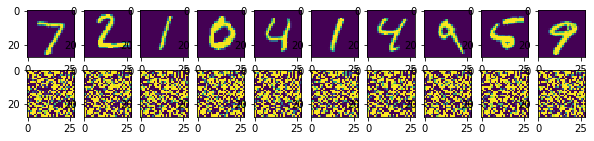

In [5]:
import matplotlib.pyplot as plt
# 评估模型
with tf.Session() as sess:
    sess.run(init)
    encoder_decode=sess.run(y_pred,feed_dict={x_:mnist.test.images[:10]})
# 比较结果
f,a=plt.subplots(2,10,figsize=(10,2))
for i in range(10):
    # 绘制数据本身
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(encoder_decode[i],(28,28)))
f.show()
plt.draw()